In [ ]:
# Instructions
# Part1: supervised learning

# Load the dataset of kidney disease.
# Use this command to rename the columns:  data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)
#  Apply logistic regression, and print the confusion matrix to validate your model. 
#  Apply KNN and choose the optimal number of neighbors
# Apply decision tree, plot it and calculate the accuracy.
# Apply random forest, calculate the new accuracy and compare it with the previous result.
# Part2: unsupervised learning

# Drop out the target variable (named “classification”)
#  Use hierarchical clustering to identify the inherent groupings within your data.
#  Plot the clusters. 
#  Plot the dendrogram. Use k-means clustering and select the optimal k.
# #  Plot the clusters. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/kidney_disease.csv')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data = df.copy()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.shape

(400, 26)

In [ ]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [ ]:
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data = data.drop('id', axis = 1)

In [ ]:
data['packed cell volume'] = pd.to_numeric(data['packed cell volume'], errors='coerce')

In [ ]:
data['white blood cell count'] = pd.to_numeric(data['white blood cell count'], errors='coerce')
data['red blood cell count'] = pd.to_numeric(data['red blood cell count'], errors='coerce')

In [ ]:
data['packed cell volume'].replace('\t?','', inplace = True)
data['packed cell volume'].replace('nan', '', inplace = True)
data['packed cell volume'].replace('\t43', '', inplace = True)


In [ ]:
cat_data = data.select_dtypes(include = 'object')
num_data = data.select_dtypes(include = 'number')
cat_data.columns, num_data.columns

(Index(['red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
        'hypertension', 'diabetes mellitus', 'coronary artery disease',
        'appetite', 'pedal edema', 'anemia', 'class'],
       dtype='object'),
 Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar',
        'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
        'potassium', 'hemoglobin', 'packed cell volume',
        'white blood cell count', 'red blood cell count'],
       dtype='object'))

In [ ]:
# Filling the Null Values 

for i in num_data.columns:
  data[i] = data[i].fillna(data[i].mean())

for i in cat_data.columns:
  data[i] = data[i].fillna(data[i].mode()[0])

In [ ]:
data.isnull().sum()

age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
data.describe()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,5.062617e-16,7.815970e-16,2.273737e-15,7.105427e-17,-3.552714e-17,0.882500,0.810000,0.105000,0.055000,-1.598721e-16,1.243450e-16,3.552714e-17,0.000000,-6.661338e-17,0.000000,6.039613e-16,1.243450e-16,-2.842171e-16,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,0.322418,0.392792,0.306937,0.228266,1.001252e+00,1.001252e+00,1.001252e+00,1.001252,1.001252e+00,1.001252,1.001252e+00,1.001252e+00,1.001252e+00,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,-2.918730e+00,-1.966580e+00,-2.313764e+00,-8.002896e-01,-4.377969e-01,0.000000,0.000000,0.000000,0.000000,-1.687482e+00,-1.136142e+00,-4.763339e-01,-14.471034,-7.553446e-01,-3.474833,-3.670550e+00,-2.462684e+00,-3.106814e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.593680e-01,-4.806345e-01,-4.490180e-01,-8.002896e-01,-4.377969e-01,1.000000,1.000000,0.000000,0.000000,-6.297642e-01,-6.181044e-01,-3.872147e-01,-0.275081,-2.227225e-01,-0.608763,-5.986465e-01,-5.678913e-01,-2.471631e-01,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.484407e-01,1.311692e-01,0.000000e+00,-1.333816e-02,-4.377969e-01,1.000000,1.000000,0.000000,0.000000,-2.950433e-01,-2.727461e-01,-2.980955e-01,0.000000,0.000000e+00,0.000000,8.730874e-16,0.000000e+00,-1.058283e-15,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.382812e-01,2.623384e-01,4.833547e-01,7.736133e-01,-5.398871e-17,1.000000,1.000000,0.000000,0.000000,2.628875e-02,8.784855e-02,0.000000e+00,0.377606,6.134259e-02,0.773586,6.301148e-01,3.943858e-01,4.677496e-01,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,2.271867e+00,7.692067e+00,1.415727e+00,3.134468e+00,4.425074e+00,1.000000,1.000000,1.000000,1.000000,4.578493e+00,6.776626e+00,1.299849e+01,2.770794,1.504578e+01,1.943975,1.858876e+00,7.140246e+00,3.923161e+00,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder() 

for i in cat_data.columns:
  data[i] = encoder.fit_transform(data[[i]])

for i in num_data.columns:
  data[i] = scaler.fit_transform(data[[i]])

In [ ]:
data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,-0.205464,0.262338,0.483355,-0.013338,-0.437797,1,1,0,0,-0.361987,-0.435268,-0.333743,0.000000,0.000000,1.059271,0.630115,-0.240519,5.869017e-01,1,4,1,0,0,0,0
1,-2.623810,-1.966580,0.483355,2.347516,-0.437797,1,1,0,0,0.000000,-0.800941,-0.405039,0.000000,0.000000,-0.452097,-0.107142,-0.954786,-1.058283e-15,0,3,1,0,0,0,0
2,0.620313,0.262338,-1.381391,0.773613,2.479925,1,1,0,0,3.681441,-0.089909,-0.226800,0.000000,0.000000,-1.078762,-0.967275,-0.359563,-1.058283e-15,0,4,1,1,0,1,0
3,-0.205464,-0.480635,-2.313764,2.347516,-0.437797,1,0,1,0,-0.415543,-0.028964,0.129677,-2.885831,-0.755345,-0.488960,-0.844399,-0.677016,-9.620759e-01,1,3,1,1,1,1,0
4,-0.028511,0.262338,-1.381391,0.773613,-0.437797,1,1,0,0,-0.562820,-0.638420,-0.298096,0.000000,0.000000,-0.341509,-0.475770,-0.438926,-1.280110e-01,0,3,1,0,0,0,0


In [ ]:
X = data.drop('class', axis= 1)
y = data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state = 30)


In [ ]:
scaler.fit(X_test)

StandardScaler()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
report = classification_report(y_test,log_pred)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        51
           2       0.94      1.00      0.97        29

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



<Axes: >

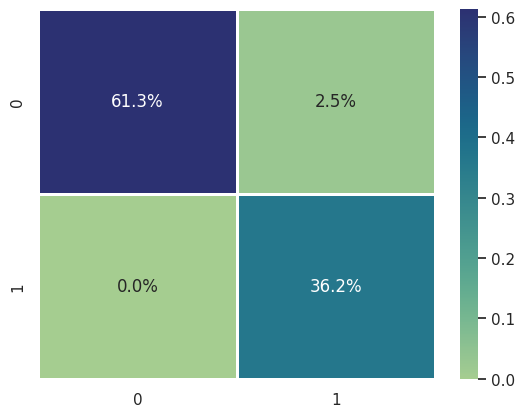

In [ ]:
print(report)
sns.set(style = 'darkgrid')
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='crest', fmt='.1%', linewidth=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbours = 20
scores=[]
for k in range(1, neighbours):
    knn = KNeighborsClassifier(neighbours - k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy for k=',k,'is: ',round(accuracy_score(y_pred, y_test), 2))
    scores.append(round(accuracy_score(y_pred, y_test), 2))

print(f"\nTHE BEST RESULT IS = {max(scores)}")

Accuracy for k= 1 is:  0.96
Accuracy for k= 2 is:  0.96
Accuracy for k= 3 is:  0.96
Accuracy for k= 4 is:  0.96
Accuracy for k= 5 is:  0.95
Accuracy for k= 6 is:  0.96
Accuracy for k= 7 is:  0.96
Accuracy for k= 8 is:  0.96
Accuracy for k= 9 is:  0.96
Accuracy for k= 10 is:  0.98
Accuracy for k= 11 is:  0.98
Accuracy for k= 12 is:  0.98
Accuracy for k= 13 is:  0.98
Accuracy for k= 14 is:  0.98
Accuracy for k= 15 is:  0.96
Accuracy for k= 16 is:  0.98
Accuracy for k= 17 is:  0.96
Accuracy for k= 18 is:  0.99
Accuracy for k= 19 is:  0.96

THE BEST RESULT IS = 0.99


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           2       0.91      1.00      0.95        29

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



<Axes: >

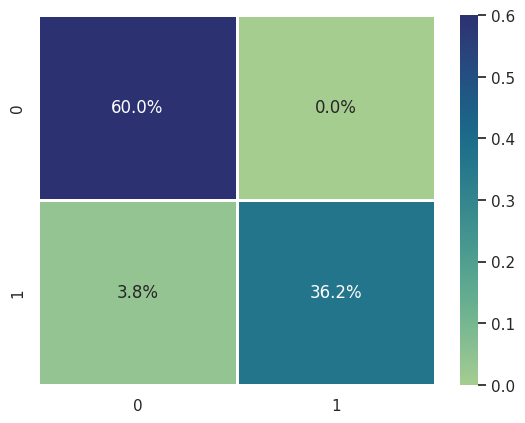

In [ ]:
knn = KNeighborsClassifier(18)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
knn_cm = confusion_matrix(y_pred, y_test)

sns.set(style = 'darkgrid')
sns.heatmap(knn_cm/np.sum(knn_cm), annot=True, cmap='crest', fmt='.1%', linewidth=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# Model Creation
tree_model.fit(X_train, y_train)

# Predict the test data for checking accuracy
prediction = tree_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           2       0.93      0.97      0.95        29

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



<Axes: >

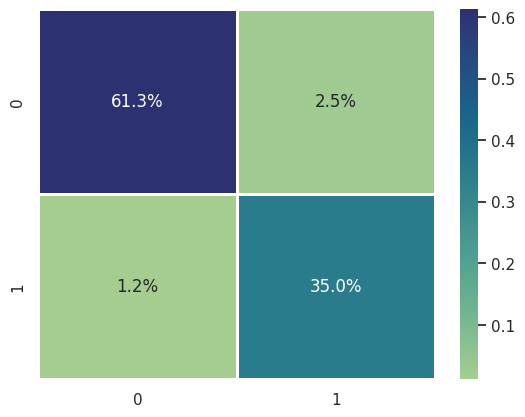

In [ ]:
tree_model_predict = tree_model.predict(X_test)
print(classification_report(y_test, tree_model_predict))
tree_cm = confusion_matrix(y_test, tree_model_predict)

sns.set(style = 'darkgrid')
sns.heatmap(tree_cm/np.sum(tree_cm), annot=True, cmap='crest', fmt='.1%', linewidth=1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           2       0.97      1.00      0.98        29

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



<Axes: >

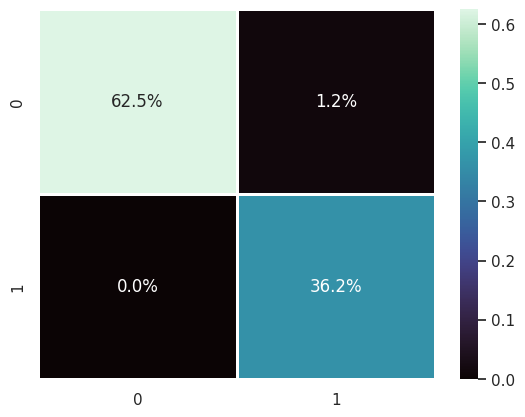

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict the test data for checking accuracy
prediction = classifier.predict(X_test)

classifier_predict = classifier.predict(X_test)
print(classification_report(y_test, classifier_predict))
rf_cm = confusion_matrix(y_test, classifier_predict)

sns.set(style = 'darkgrid')
# sns.heatmap(tree_cm/np.sum(tree_cm), annot=True, cmap='crest', fmt='.1%', linewidth=1)
sns.heatmap(rf_cm/np.sum(rf_cm), annot=True, cmap='mako', fmt='.1%', linewidth=1)

[Text(0.5, 1.0, 'Random Forest CM')]

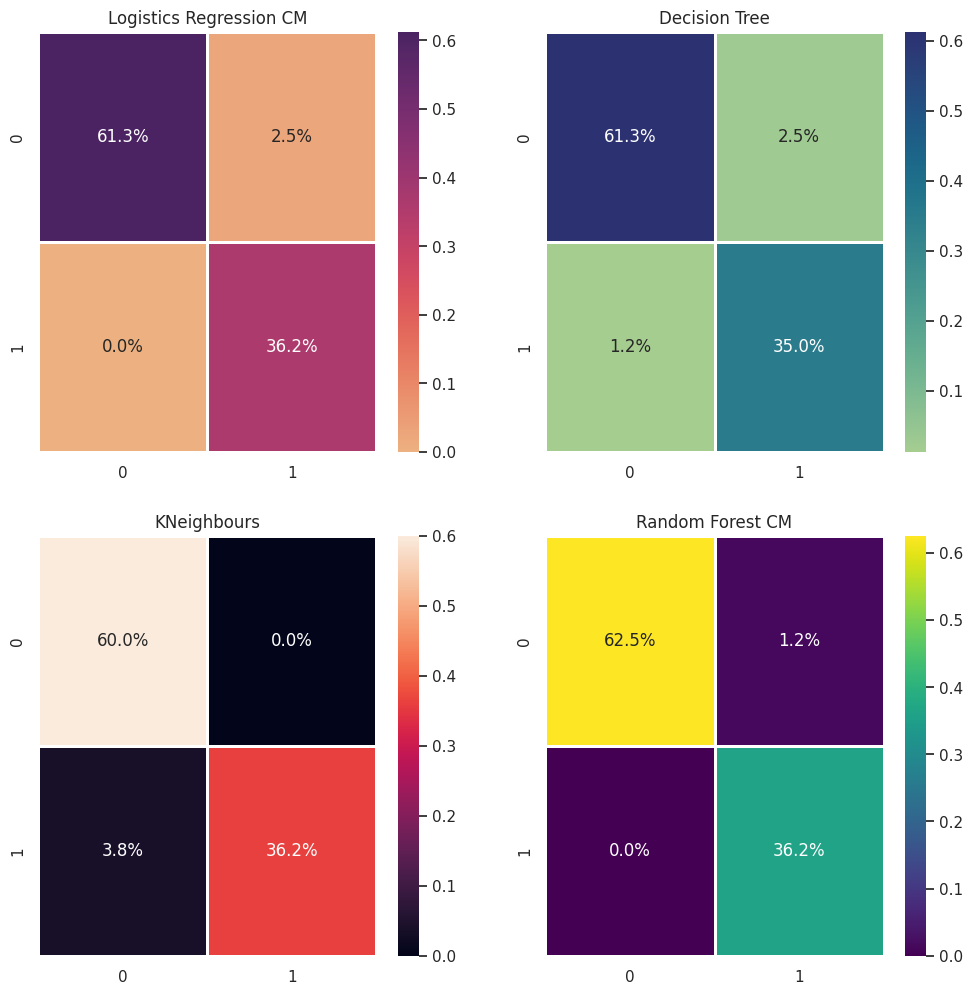

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
sns.set()

sns.heatmap(cm/np.sum(cm), annot=True, cmap='flare', fmt='.1%', linewidth=1, ax = ax[0,0]).set(title = 'Logistics Regression CM')
sns.heatmap(knn_cm/np.sum(knn_cm), annot=True, cmap='rocket', fmt='.1%', linewidth=1, ax=ax[1,0]).set(title = 'KNeighbours')
sns.heatmap(tree_cm/np.sum(tree_cm), annot=True, cmap='crest', fmt='.1%', linewidth=1, ax=ax[0,1]).set(title = 'Decision Tree')
sns.heatmap(rf_cm/np.sum(rf_cm), annot=True, cmap='viridis', fmt='.1%', linewidth=1, ax = ax[1,1]).set(title = 'Random Forest CM')



In [ ]:
# Part2: unsupervised learning
# Drop out the target variable (named “classification”)
#  Use hierarchical clustering to identify the inherent groupings within your data.
#  Plot the clusters. 
#  Plot the dendrogram. Use k-means clustering and select the optimal k.
# #  Plot the clusters. 

In [ ]:
data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,-0.205464,0.262338,0.483355,-0.013338,-0.437797,1,1,0,0,-0.361987,-0.435268,-0.333743,0.000000,0.000000,1.059271,0.630115,-0.240519,5.869017e-01,1,4,1,0,0,0,0
1,-2.623810,-1.966580,0.483355,2.347516,-0.437797,1,1,0,0,0.000000,-0.800941,-0.405039,0.000000,0.000000,-0.452097,-0.107142,-0.954786,-1.058283e-15,0,3,1,0,0,0,0
2,0.620313,0.262338,-1.381391,0.773613,2.479925,1,1,0,0,3.681441,-0.089909,-0.226800,0.000000,0.000000,-1.078762,-0.967275,-0.359563,-1.058283e-15,0,4,1,1,0,1,0
3,-0.205464,-0.480635,-2.313764,2.347516,-0.437797,1,0,1,0,-0.415543,-0.028964,0.129677,-2.885831,-0.755345,-0.488960,-0.844399,-0.677016,-9.620759e-01,1,3,1,1,1,1,0
4,-0.028511,0.262338,-1.381391,0.773613,-0.437797,1,1,0,0,-0.562820,-0.638420,-0.298096,0.000000,0.000000,-0.341509,-0.475770,-0.438926,-1.280110e-01,0,3,1,0,0,0,0


In [ ]:
new_data = data.drop('class', axis = 1)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(new_data)


Text(0.5, 1.0, 'Dendogram Plot')

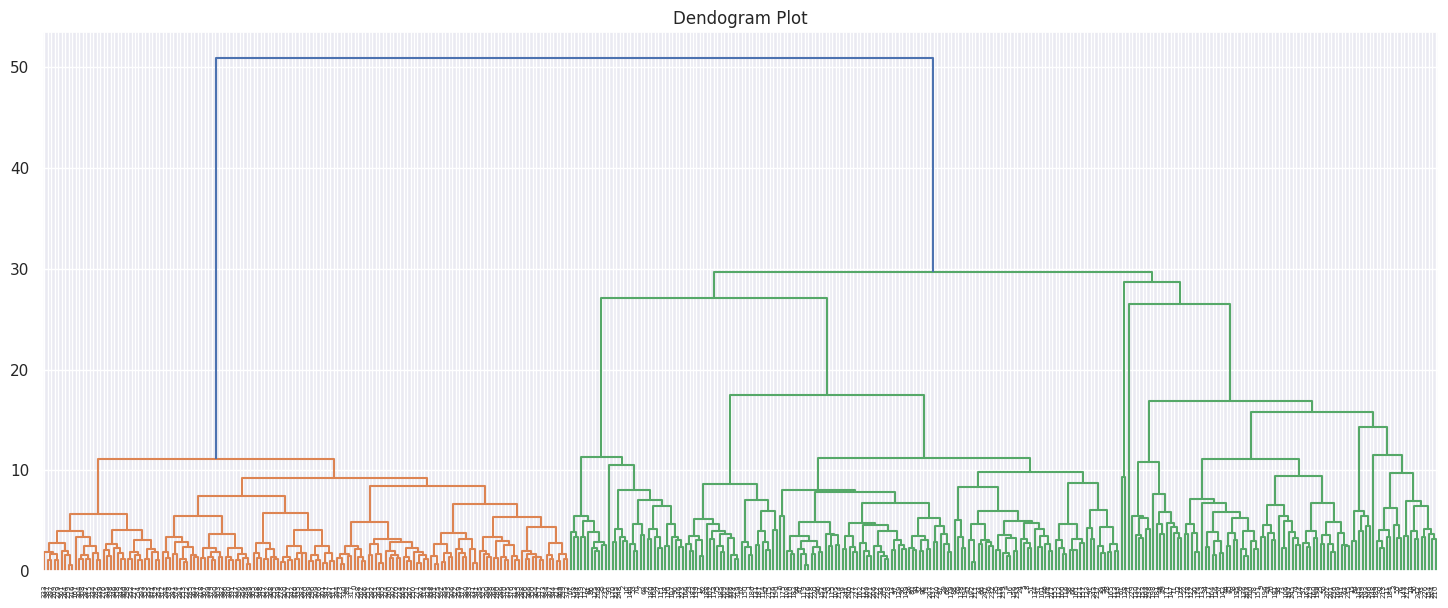

In [ ]:
import scipy.cluster.hierarchy as shc  
plt.figure(figsize = (18, 7))

dendro = shc.dendrogram(shc.linkage(new_data, method="ward"))
plt.title("Dendogram Plot")  

In [ ]:
h_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

In [ ]:
pred = h_cluster.fit_predict(new_data) 

In [ ]:
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
pred_data = pd.DataFrame(pred)

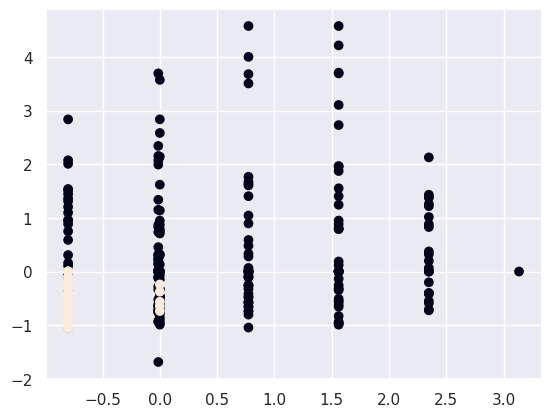

In [ ]:
plt.scatter(new_data['albumin'], new_data['blood glucose random'], c=pred_data[0])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=45)
kmeans.fit(new_data)
# new_data['label'] = pd.DataFrame(kmeans.labels_)
kmeans.predict(new_data)
# print(kmeans.cluster_centers_)


array([1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
new_data['label'] = pd.DataFrame(kmeans.labels_)

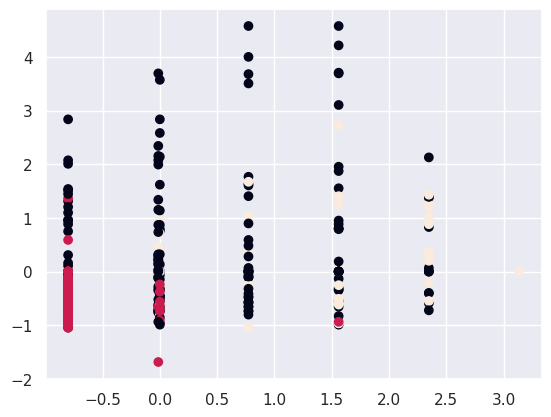

In [ ]:
plt.scatter(new_data['albumin'], new_data['blood glucose random'], c=new_data['label'])